# Music Genre Data Analysis

## Library Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

## Data Import and Overview

In [3]:
popular = pd.read_csv('./data/high_popularity_spotify_data.csv')
not_popular = pd.read_csv('./data/low_popularity_spotify_data.csv')

In [4]:
popular.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')

In [5]:
not_popular.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name'],
      dtype='object')

In [6]:
org_df = pd.merge(popular, not_popular, how='outer')

In [7]:
org_df.shape

(4788, 29)

In [8]:
org_df.isna().sum()

energy                      1
tempo                       1
danceability                1
playlist_genre              0
loudness                    1
liveness                    1
valence                     1
track_artist                0
time_signature              1
speechiness                 1
track_popularity            0
track_href                  1
uri                         1
track_album_name            1
playlist_name               0
analysis_url                1
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            1
track_album_id              0
mode                        1
key                         1
duration_ms                 1
acousticness                1
id                          1
playlist_subgenre           0
type                        1
playlist_id                 0
dtype: int64

In [9]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4787 non-null   float64
 1   tempo                     4787 non-null   float64
 2   danceability              4787 non-null   float64
 3   playlist_genre            4788 non-null   object 
 4   loudness                  4787 non-null   float64
 5   liveness                  4787 non-null   float64
 6   valence                   4787 non-null   float64
 7   track_artist              4788 non-null   object 
 8   time_signature            4787 non-null   float64
 9   speechiness               4787 non-null   float64
 10  track_popularity          4788 non-null   int64  
 11  track_href                4787 non-null   object 
 12  uri                       4787 non-null   object 
 13  track_album_name          4787 non-null   object 
 14  playlist

In [10]:
org_df.describe()

energy        tempo  danceability     loudness     liveness  \
count  4787.000000  4787.000000   4787.000000  4787.000000  4787.000000   
mean      0.585853   118.246490      0.621824    -9.299576     0.167751   
std       0.246709    28.491026      0.187946     7.142995     0.124648   
min       0.000202    48.232000      0.058900   -48.069000     0.021000   
25%       0.440500    96.081000      0.524000   -10.328000     0.095400   
50%       0.632000   118.029000      0.653000    -7.215000     0.118000   
75%       0.776000   136.715000      0.757000    -5.339000     0.195000   
max       0.998000   241.426000      0.979000     1.318000     0.979000   

           valence  time_signature  speechiness  track_popularity  \
count  4787.000000     4787.000000  4787.000000       4788.000000   
mean      0.481410        3.936077     0.101255         54.642231   
std       0.258295        0.410487     0.100742         19.877514   
min       0.029600        1.000000     0.021900         11.000000   
25%       0.273000        4.000000     0.038500         41.000000   
50%       0.482000        4.000000     0.055900         55.000000   
75%       0.690000        4.000000     0.117000         72.000000   
max       0.987000        5.000000     0.927000        100.000000   

       instrumentalness         mode          key   duration_ms  acousticness  
count       4787.000000  4787.000000  4787.000000  4.787000e+03   4787.000000  
mean           0.202403     0.562983     5.229580  2.061979e+05      0.342066  
std            0.352762     0.496069     3.580683  8.196134e+04      0.325910  
min            0.000000     0.000000     0.000000  3.537500e+04      0.000004  
25%            0.000000     0.000000     2.000000  1.589935e+05      0.052700  
50%            0.000096     1.000000     5.000000  1.948870e+05      0.225000  
75%            0.207500     1.000000     8.000000  2.335330e+05      0.593000  
max            0.991000     1.000000    11.000000  1.355260e+06      0.996000

In [11]:
org_df.describe(include='O')

playlist_genre track_artist  \
count            4788         4788   
unique             35         3390   
top        electronic    Bad Bunny   
freq              578           29   

                                               track_href  \
count                                                4787   
unique                                               4494   
top     https://api.spotify.com/v1/tracks/6AI3ezQ4o3HU...   
freq                                                    4   

                                         uri   track_album_name  \
count                                   4787               4787   
unique                                  4494               3815   
top     spotify:track:6AI3ezQ4o3HUoP6Dhudph3  Sincerely, Benson   
freq                                       4                 21   

           playlist_name                                       analysis_url  \
count               4788                                               4787   
unique               116                                               4494   
top     Meditative Vibes  https://api.spotify.com/v1/audio-analysis/6AI3...   
freq                 230                                                  4   

                      track_id track_name track_album_release_date  \
count                     4788       4788                     4788   
unique                    4495       4372                     1846   
top     13VXuHw3O8Yt7VwRIDqSo4  Too Sweet               2024-11-15   
freq                         4          5                       35   

                track_album_id                      id playlist_subgenre  \
count                     4788                    4787              4788   
unique                    3879                    4494                84   
top     3dctFKCiGPizmylLp0SN0a  6AI3ezQ4o3HUoP6Dhudph3            modern   
freq                        21                       4               693   

                  type             playlist_id  
count             4787                    4788  
unique               1                     115  
top     audio_features  3kEpLybbAlVUVimW5Evijb  
freq              4787                     230

## Data Cleaning

> There are very vew missing values, so we will drop those columns.  

In [12]:
org_df = org_df.dropna()

In [13]:
org_df.shape

(4786, 29)

In [14]:
org_df.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')

In [15]:
important_cols = ['energy', 'tempo', 'danceability', 
                         'loudness', 'liveness', 'valence', 
                         'speechiness', 'instrumentalness', 'mode', 
                         'key', 'duration_ms', 'acousticness', 'playlist_genre']

reduced_df = org_df[important_cols]

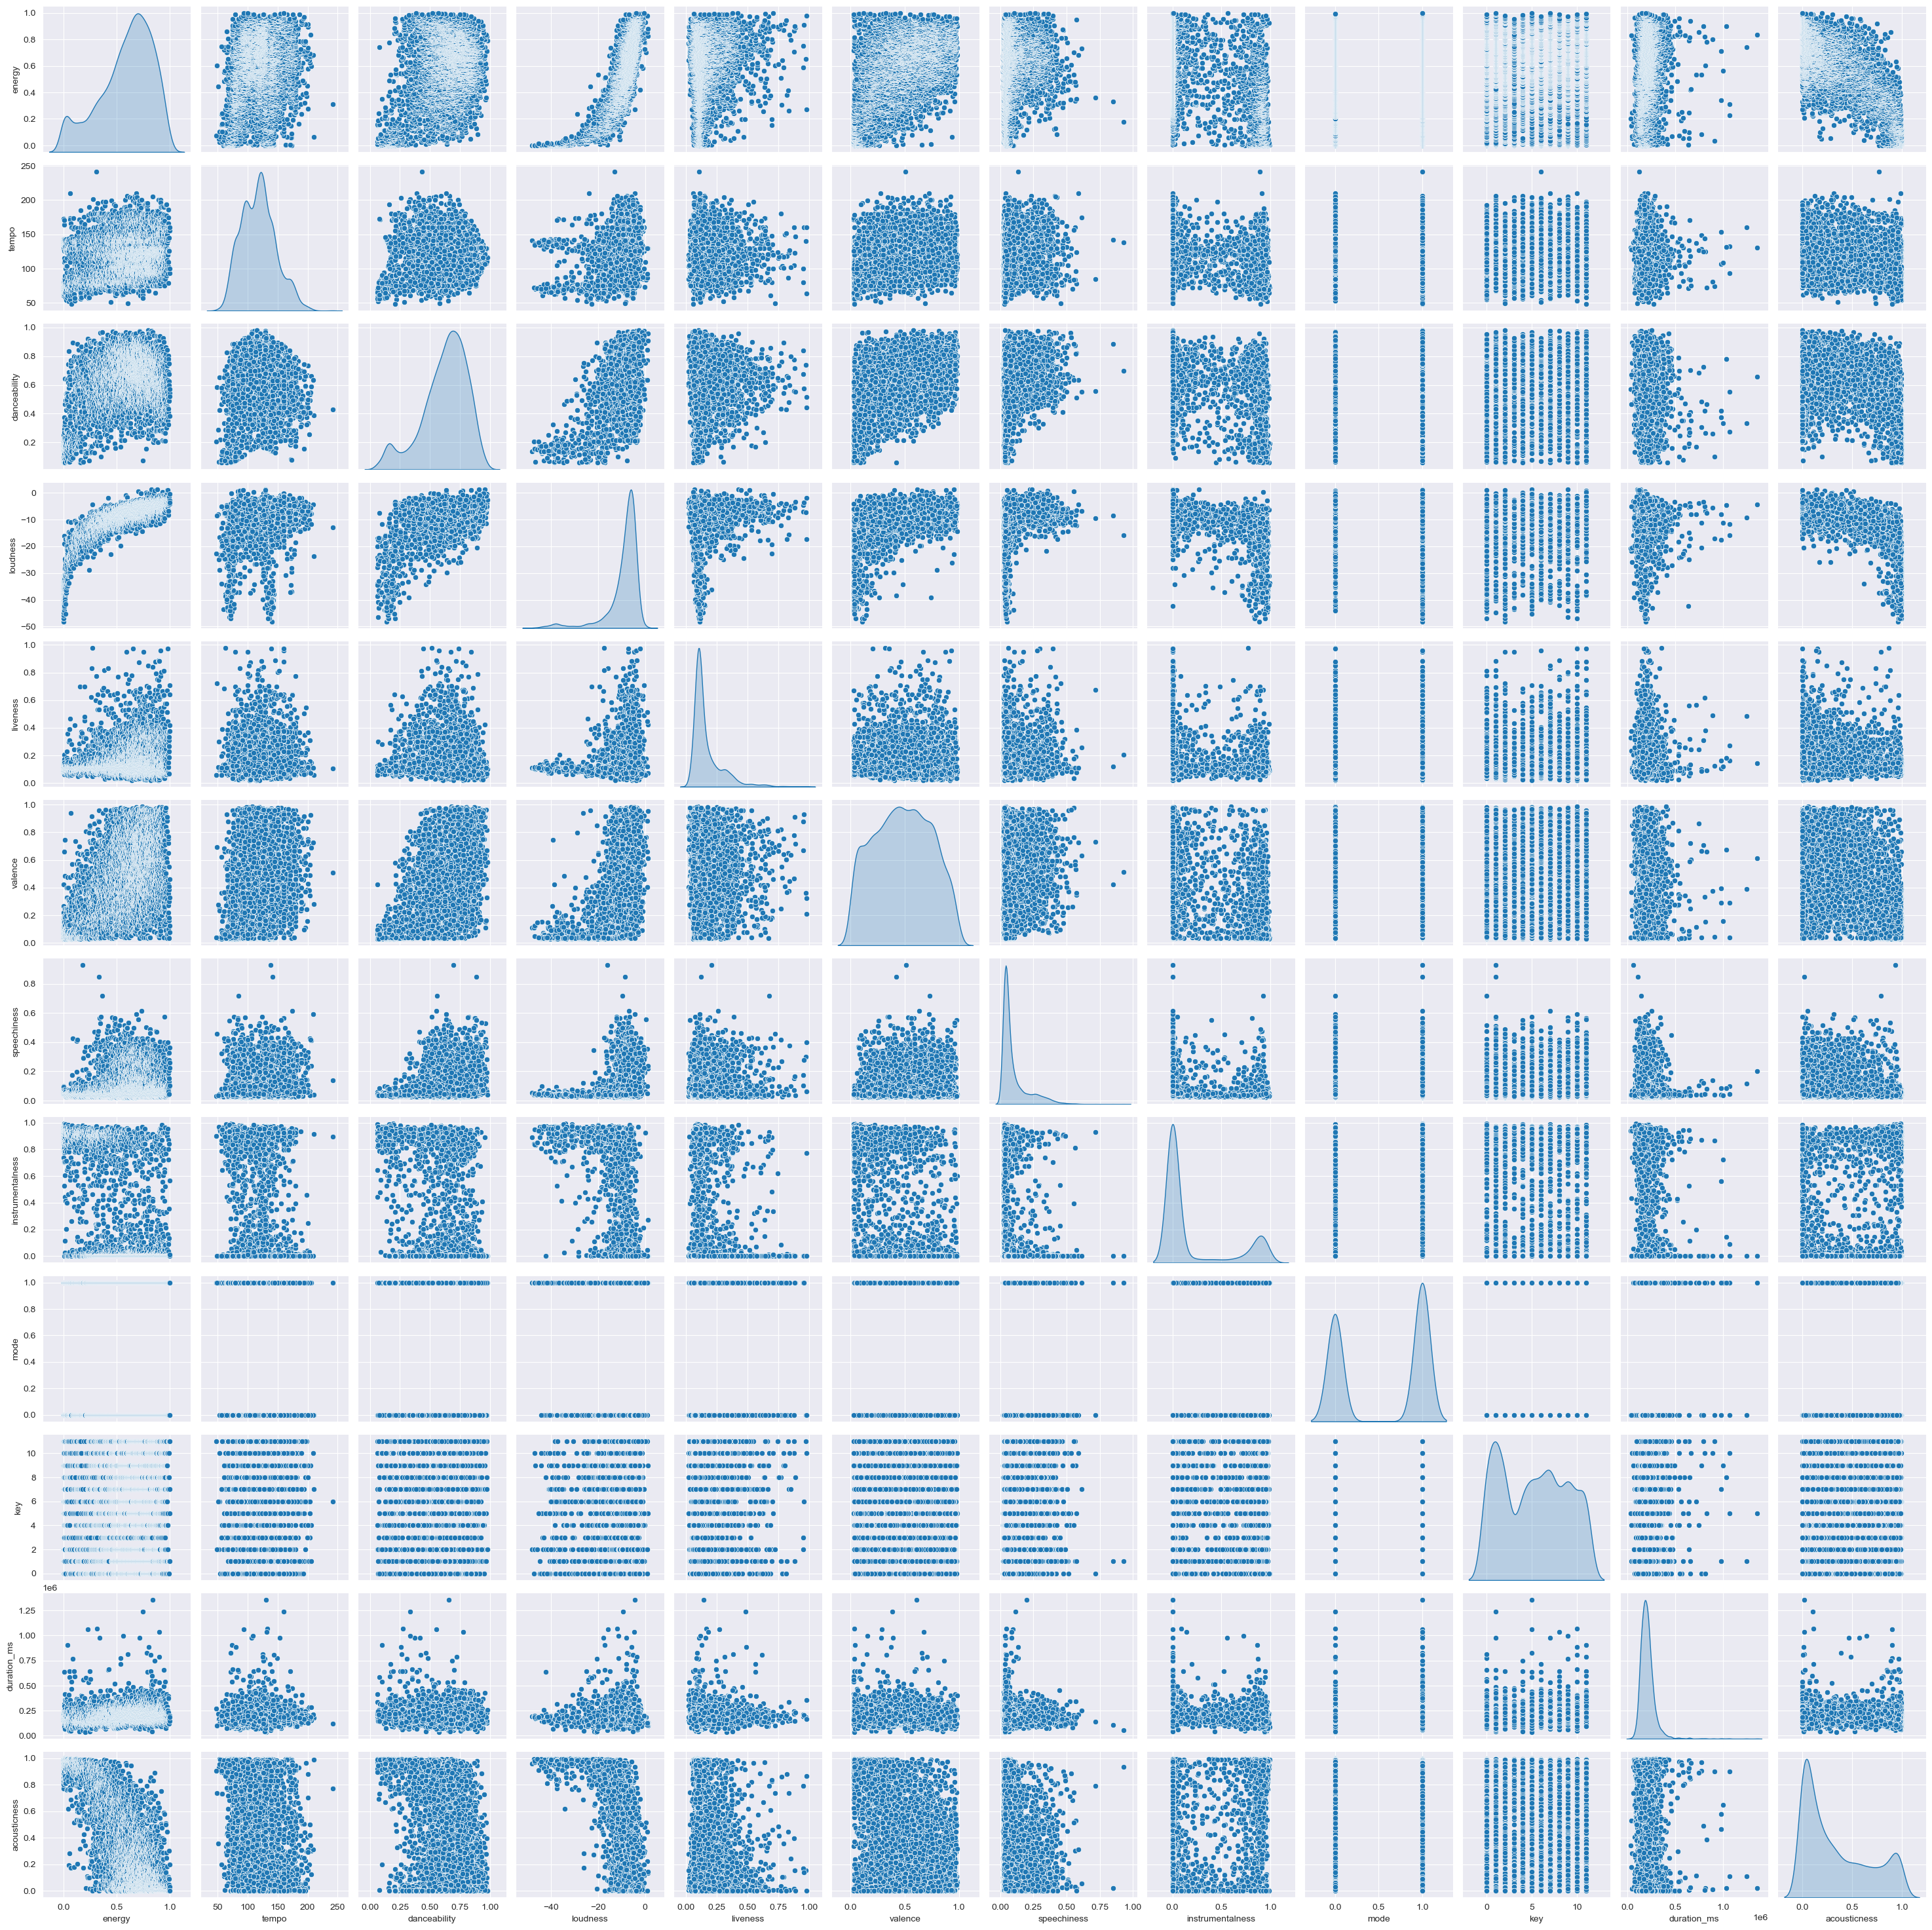

In [16]:
sns.pairplot(data=reduced_df, diag_kind='kde')

Let's look at the distribution of some of these columns. 

In [17]:
reduced_df.value_counts('playlist_genre')

playlist_genre
electronic    578
pop           515
latin         420
hip-hop       381
ambient       358
rock          342
lofi          298
world         228
arabic        207
brazilian     148
jazz          146
gaming        133
classical     120
blues          87
wellness       80
afrobeats      80
punk           74
turkish        70
folk           68
indian         56
r&b            50
metal          48
soul           44
gospel         39
korean         33
funk           28
cantopop       27
reggae         24
j-pop          23
indie          17
k-pop          16
soca           14
mandopop       14
country        11
disco           9
Name: count, dtype: int64

We may have too many genres to visualize the data, so let's only do the analysis and prediction for the top 10 most common genres.

In [18]:
genres = [
    "electronic",
    "pop",
    "latin",
    "hip-hop",
    "ambient",
    "rock",
    "lofi",
    "world",
    "arabic",
    "brazilian",
]

df = reduced_df[reduced_df['playlist_genre'].isin(genres)]

In [19]:
df.shape

(3475, 13)

<Axes: xlabel='energy', ylabel='Count'>

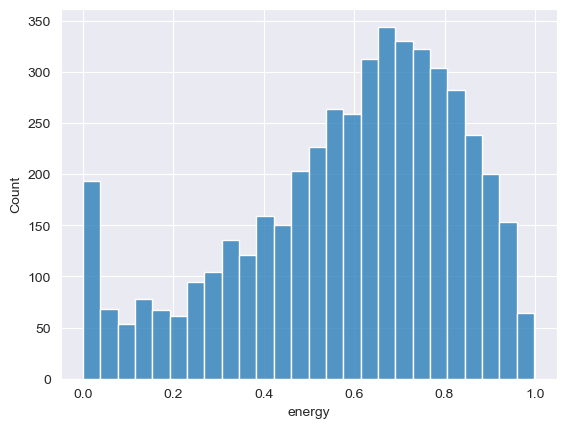

In [20]:
sns.histplot(data=reduced_df, x='energy')

<Axes: xlabel='energy', ylabel='Count'>

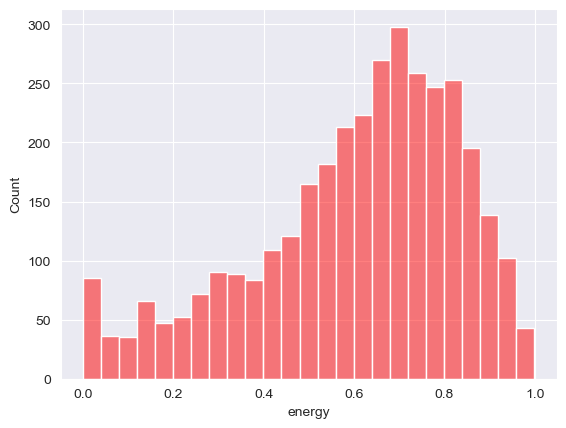

In [21]:
sns.histplot(data=df, x='energy', color='red', alpha=0.5)

<Axes: xlabel='energy', ylabel='Count'>

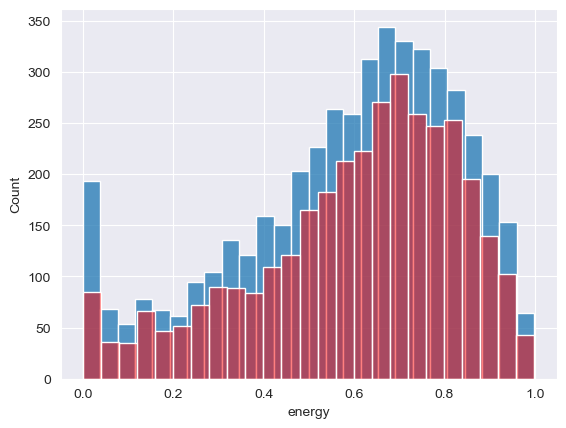

In [22]:
sns.histplot(data=reduced_df, x='energy')
sns.histplot(data=df, x='energy', color='red', alpha=0.5)

<Axes: xlabel='tempo', ylabel='Count'>

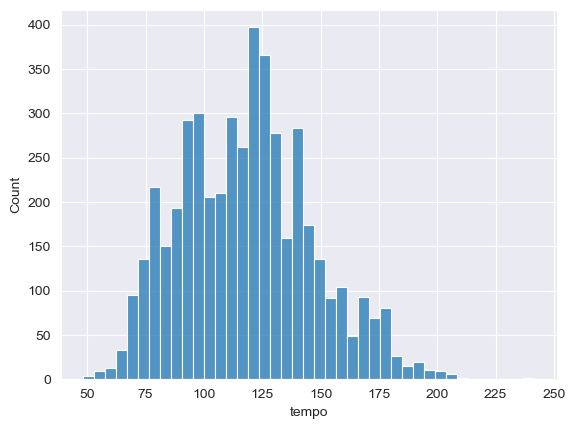

In [23]:
sns.histplot(data=reduced_df, x='tempo')

<Axes: xlabel='tempo', ylabel='Count'>

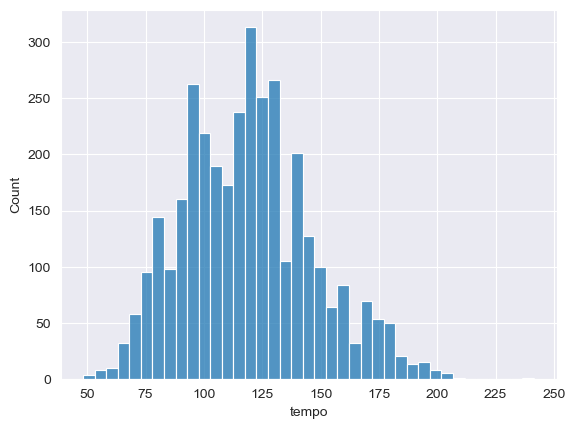

In [24]:
sns.histplot(data=df, x='tempo')

<Axes: xlabel='tempo', ylabel='Count'>

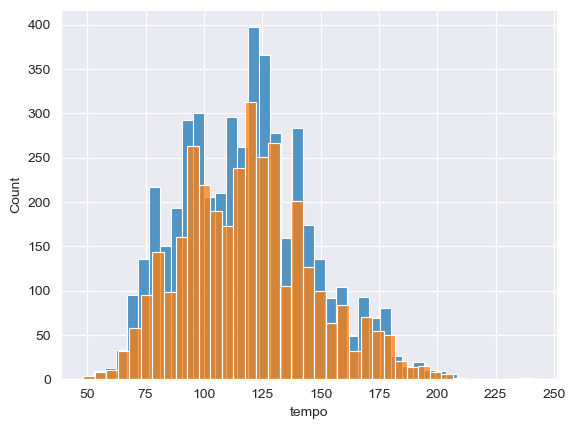

In [25]:
sns.histplot(data=reduced_df, x='tempo')
sns.histplot(data=df, x='tempo')

<Axes: xlabel='loudness', ylabel='Count'>

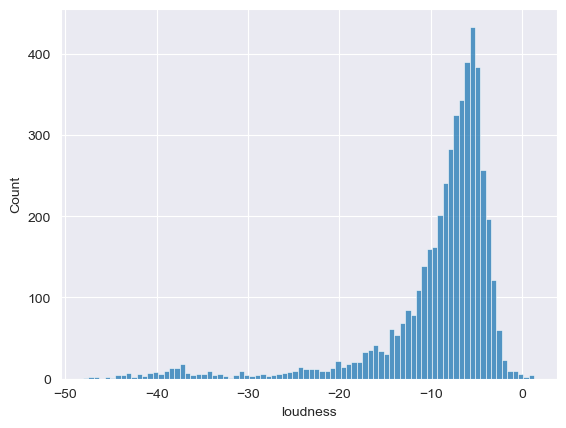

In [26]:
sns.histplot(data=reduced_df, x='loudness')

<Axes: xlabel='loudness', ylabel='Count'>

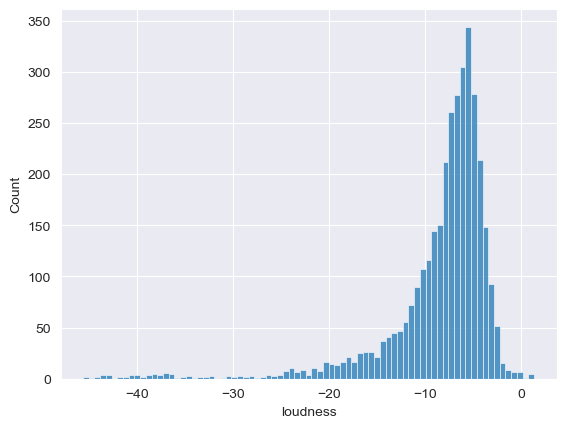

In [27]:
sns.histplot(data=df, x='loudness')

<Axes: xlabel='loudness', ylabel='Count'>

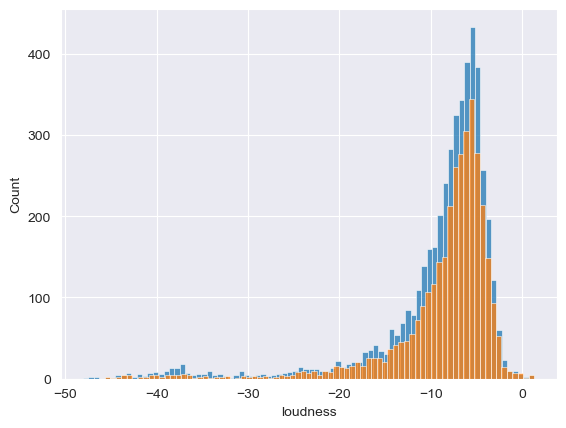

In [28]:
sns.histplot(data=reduced_df, x='loudness')
sns.histplot(data=df, x='loudness')

## Exploratory Data Analysis

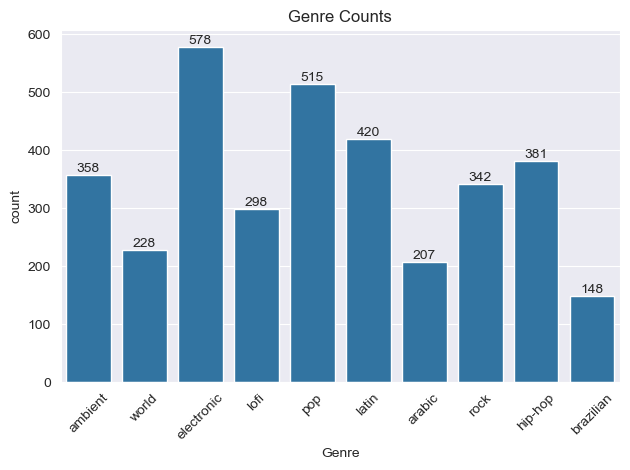

In [46]:
ax = sns.countplot(data=df, x='playlist_genre')
ax.bar_label(ax.containers[0])
plt.xlabel("Genre")
plt.title("Genre Counts")
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig("./images/genre_count.png")


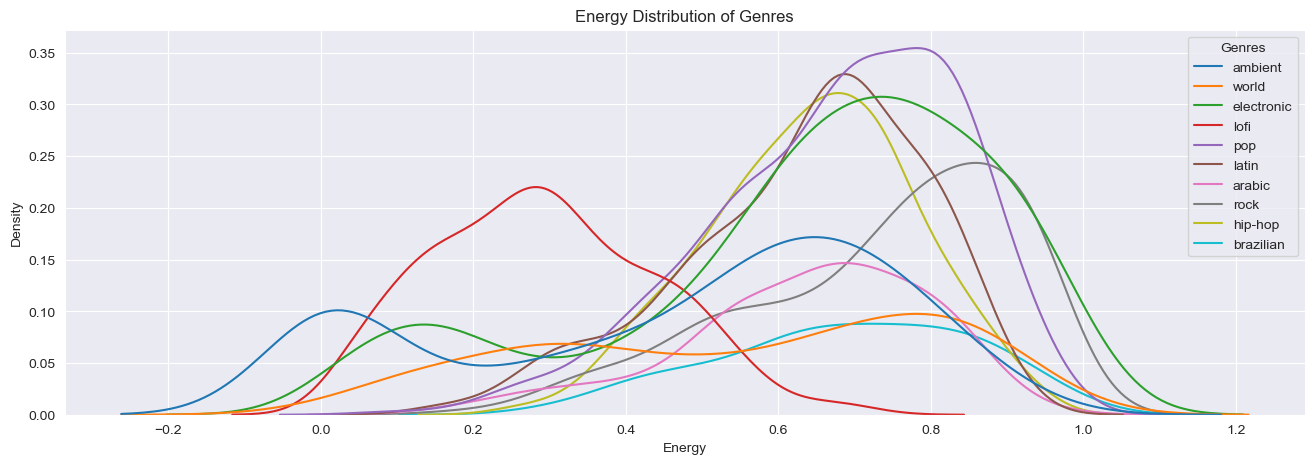

In [47]:
plt.figure(figsize=(16, 5))
ax = sns.kdeplot(data=df, x='energy', hue='playlist_genre')

legend = ax.get_legend()
legend.set_title("Genres")

plt.title("Energy Distribution of Genres")
plt.xlabel("Energy")
plt.savefig('./images/energy_kde.png')

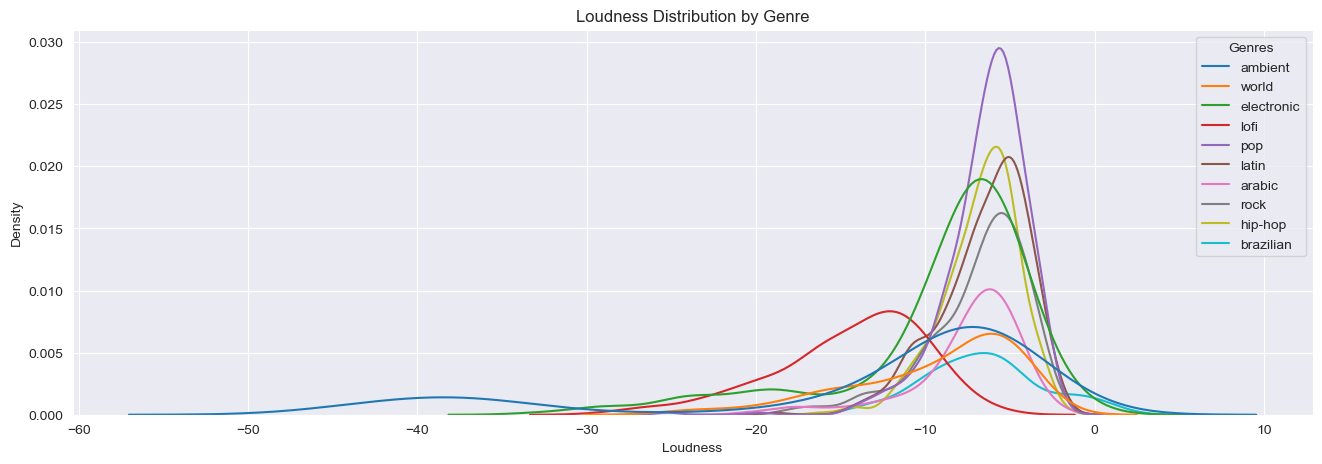

In [53]:
plt.figure(figsize=(16, 5))
ax = sns.kdeplot(data=df, x='loudness', hue='playlist_genre')
legend = ax.get_legend()
legend.set_title("Genres")
plt.title("Loudness Distribution by Genre")
plt.xlabel("Loudness")
plt.savefig('./images/loudness_kde.png')

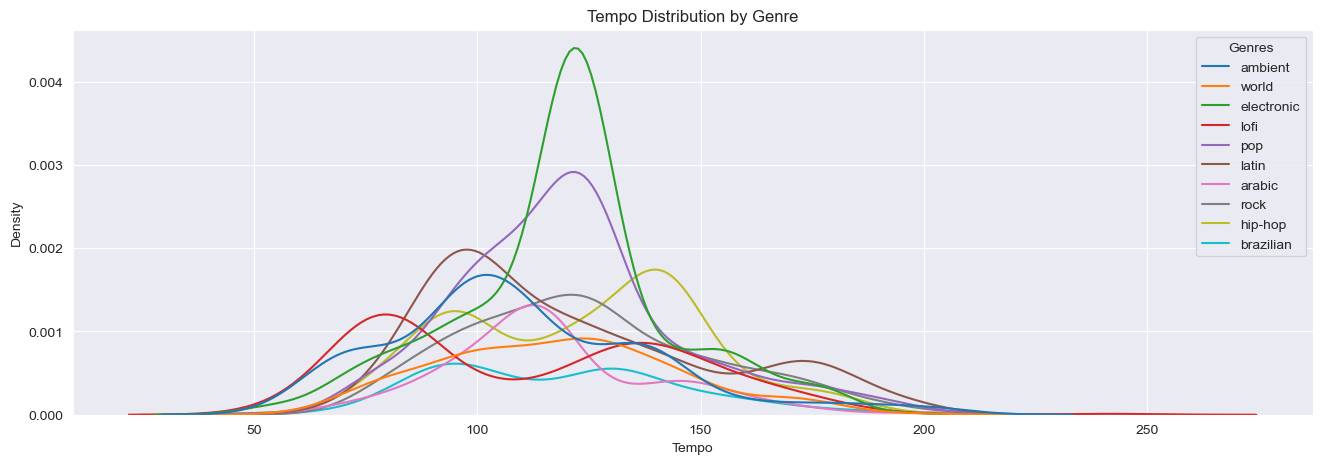

In [52]:
plt.figure(figsize=(16, 5))
ax = sns.kdeplot(data=df, x='tempo', hue='playlist_genre')
legend = ax.get_legend()
legend.set_title("Genres")
plt.title("Tempo Distribution by Genre")
plt.xlabel("Tempo")
plt.savefig('./images/tempo_kde.png')

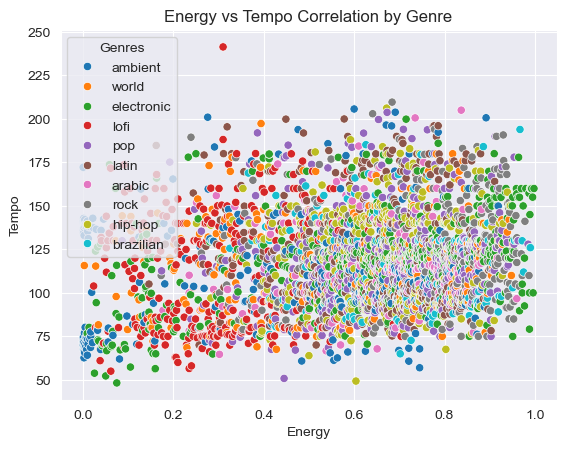

In [50]:
ax = sns.scatterplot(data=df, x='energy', y='tempo', hue='playlist_genre')
plt.title("Energy vs Tempo Correlation by Genre")
plt.xlabel("Energy")
plt.ylabel("Tempo")
legend = ax.get_legend()
legend.set_title("Genres")
plt.savefig('./images/energy_tempo.png')

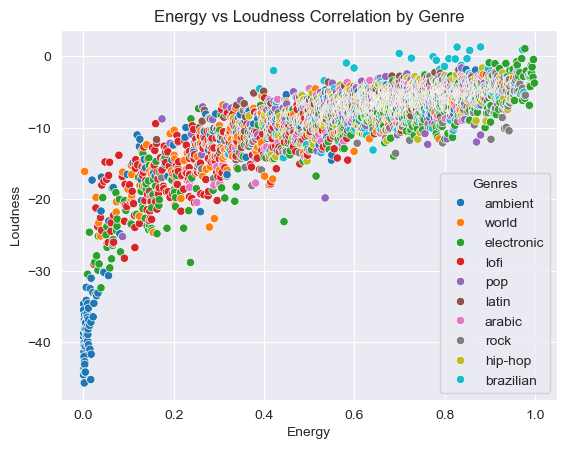

In [51]:
ax= sns.scatterplot(data=df, x='energy', y='loudness', hue='playlist_genre')
plt.title("Energy vs Loudness Correlation by Genre")
plt.xlabel("Energy")
plt.ylabel("Loudness")
legend = ax.get_legend()
legend.set_title("Genres")
plt.savefig('./images/energy_loudness.png')

In [ ]:
df.rename(columns={'playlist_genre': 'genre'}, inplace=True)

In [ ]:
# df.to_csv('./data/cleaned_music.csv', index=False)